In [2]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons
from mpl_toolkits.mplot3d import Axes3D
import math
import os
import time
import itertools

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

%matplotlib notebook

plt.rcParams['figure.figsize'] = [7, 7]

In [3]:
def calcFirstLayer(A1, b1):
    if A1[0, 1] != 0:
        x1 = np.linspace(-10, 10, 1000)
        y1 = (-b1[0] - A1[0, 0]*x1)/A1[0, 1]
    else:
        y1 = np.linspace(-10, 10, 1000)
        x1 = (-b1[0] - A1[0, 1]*y1)/A1[0, 0]

    if A1[1, 1] != 0:
        x2 = np.linspace(-10, 10, 1000)
        y2 = (-b1[1] - A1[1, 0]*x2)/A1[1, 1]
    else:
        y2 = np.linspace(-10, 10, 1000)
        x2 = (-b1[1] - A1[1, 1]*y2)/A1[1, 0]
    return x1, y1, x2, y2

In [4]:
def calcSecondLayer(A1, b1, A2, b2):
    x1 = np.array([])
    y1 = np.array([])
    x2 = np.array([])
    y2 = np.array([])
    for which in itertools.product([True, False], repeat=2):
        if not (which[0] or which[1]):
            continue
        if which[0]:
            gamma1 = 1.0
        else:
            gamma1 = 0.0
        if which[1]:
            gamma2 = 1.0
        else:
            gamma2 = 0.0

        x = np.linspace(-10, 10, 1000)
        for i in range(2):
            if A2[i, 0]*gamma1*A1[0, 1] + A2[i, 1]*gamma2*A1[1, 1] != 0:
                x = np.linspace(-10, 10, 1000)
                y = (-b2[i] - A2[i, 0]*gamma1*(A1[0, 0]*x + b1[0]) - A2[i, 1]*gamma2*(A1[1, 0]*x + b1[1]))/(A2[i, 0]*gamma1*A1[0, 1] + A2[i, 1]*gamma2*A1[1, 1])
            else:
                y = np.linspace(-10, 10, 1000)
                x = (-b2[i] - A2[i, 0]*gamma1*(A1[0, 1]*y + b1[0]) - A2[i, 1]*gamma2*(A1[1, 1]*y + b1[1]))/(A2[i, 0]*gamma1*A1[0, 0] + A2[i, 1]*gamma2*A1[1, 0])

            if which[0]:
                idx = A1[0, 0]*x + A1[0, 1]*y + b1[0] >= 0
                x = x[idx]
                y = y[idx]
            else:
                idx = A1[0, 0]*x + A1[0, 1]*y + b1[0] <= 0
                x = x[idx]
                y = y[idx]
            if which[1]:
                idx = A1[1, 0]*x + A1[1, 1]*y + b1[1] >= 0
                x = x[idx]
                y = y[idx]
            else:
                idx = A1[1, 0]*x + A1[1, 1]*y + b1[1] <= 0
                x = x[idx]
                y = y[idx]
            
            if i == 0:
                x1 = np.append(x1, x)
                y1 = np.append(y1, y)
            else:
                x2 = np.append(x2, x)
                y2 = np.append(y2, y)
    return x1, y1, x2, y2


In [5]:
def calcThirdLayer(A1, b1, A2, b2, A3, b3):
    x1 = np.array([])
    y1 = np.array([])
    x2 = np.array([])
    y2 = np.array([])
    for which in itertools.product([True, False], repeat=4):
        if (not (which[0] or which[1])) or (not (which[2] or which[3])):
            continue
        if which[0]:
            gamma1 = 1.0
        else:
            gamma1 = 0.0
        if which[1]:
            gamma2 = 1.0
        else:
            gamma2 = 0.0
        if which[2]:
            gamma3 = 1.0
        else:
            gamma3 = 0.0
        if which[3]:
            gamma4 = 1.0
        else:
            gamma4 = 0.0

        for i in range(2):
            if A3[i, 0]*gamma3*(A2[0,0]*gamma1*A1[0,1] + A2[0,1]*gamma2*A1[1,1]) + A3[i, 1]*gamma4*(A2[1,0]*gamma1*A1[0,1] + A2[1,1]*gamma2*A1[1,1]) != 0:
                x = np.linspace(-10, 10, 1000)
                y = (-b3[i] - A3[i, 0]*gamma3*(A2[0, 0]*gamma1*(A1[0, 0]*x + b1[0]) + A2[0, 1]*gamma2*(A1[1, 0]*x + b1[1]) + b2[0]) \
                            - A3[i, 1]*gamma4*(A2[1, 0]*gamma1*(A1[0, 0]*x + b1[0]) + A2[1, 1]*gamma2*(A1[1, 0]*x + b1[1]) + b2[1]))/ \
                    (A3[i, 0]*gamma3*(A2[0,0]*gamma1*A1[0,1] + A2[0,1]*gamma2*A1[1,1]) + A3[i, 1]*gamma4*(A2[1,0]*gamma1*A1[0,1] + A2[1,1]*gamma2*A1[1,1]))
            elif A3[i, 0]*gamma3*(A2[0,0]*gamma1*A1[0,0] + A2[0,1]*gamma2*A1[1,0]) + A3[i, 1]*gamma4*(A2[1,0]*gamma1*A1[0,0] + A2[1,1]*gamma2*A1[1,0]) != 0:
                y = np.linspace(-10, 10, 1000)
                x = (-b3[i] - A3[i, 0]*gamma3*(A2[0, 0]*gamma1*(A1[0, 1]*y + b1[0]) + A2[0, 1]*gamma2*(A1[1, 1]*y + b1[1]) + b2[0]) \
                            - A3[i, 1]*gamma4*(A2[1, 0]*gamma1*(A1[0, 1]*y + b1[0]) + A2[1, 1]*gamma2*(A1[1, 1]*y + b1[1]) + b2[1]))/ \
                    (A3[i, 0]*gamma3*(A2[0,0]*gamma1*A1[0,0] + A2[0,1]*gamma2*A1[1,0]) + A3[i, 1]*gamma4*(A2[1,0]*gamma1*A1[0,0] + A2[1,1]*gamma2*A1[1,0]))
            else:
                break

            if which[0]:
                idx = A1[0, 0]*x + A1[0, 1]*y + b1[0] >= 0
                x = x[idx]
                y = y[idx]
            else:
                idx = A1[0, 0]*x + A1[0, 1]*y + b1[0] <= 0
                x = x[idx]
                y = y[idx]
                
            if which[1]:
                idx = A1[1, 0]*x + A1[1, 1]*y + b1[1] >= 0
                x = x[idx]
                y = y[idx]
            else:
                idx = A1[1, 0]*x + A1[1, 1]*y + b1[1] <= 0
                x = x[idx]
                y = y[idx]
                
            if which[2]:
                idx = A2[0, 0]*gamma1*(A1[0, 0]*x + A1[0, 1]*y + b1[0]) + A2[0, 1]*gamma2*(A1[1, 0]*x + A1[1, 1]*y + b1[1]) + b2[0] >= 0
                x = x[idx]
                y = y[idx]
            else:
                idx = A2[0, 0]*gamma1*(A1[0, 0]*x + A1[0, 1]*y + b1[0]) + A2[0, 1]*gamma2*(A1[1, 0]*x + A1[1, 1]*y + b1[1]) + b2[0] <= 0
                x = x[idx]
                y = y[idx]
                
            if which[3]:
                idx = A2[1, 0]*gamma1*(A1[0, 0]*x + A1[0, 1]*y + b1[0]) + A2[1, 1]*gamma2*(A1[1, 0]*x + A1[1, 1]*y + b1[1]) + b2[1] >= 0
                x = x[idx]
                y = y[idx]
            else:
                idx = A2[1, 0]*gamma1*(A1[0, 0]*x + A1[0, 1]*y + b1[0]) + A2[1, 1]*gamma2*(A1[1, 0]*x + A1[1, 1]*y + b1[1]) + b2[1] <= 0
                x = x[idx]
                y = y[idx]
                
            if i == 0:
                x1 = np.append(x1, x)
                y1 = np.append(y1, y)
            else:
                x2 = np.append(x2, x)
                y2 = np.append(y2, y)
    return x1, y1, x2, y2


In [13]:
# Set up plotting X and Y
x = np.linspace(-10, 10, 1000)
y = np.copy(x)

X, Y = np.meshgrid(x, y)
origShape = X.shape

X = np.reshape(X, -1)
Y = np.reshape(Y, -1)

inputVal = np.vstack((X, Y))



In [ ]:
# First layer: Ax + b = 0
A1 = np.array([[1.0, 0.5], [0.0, 1.0]])
b1 = np.array([0.0, 0.0])

<IPython.core.display.Javascript object>


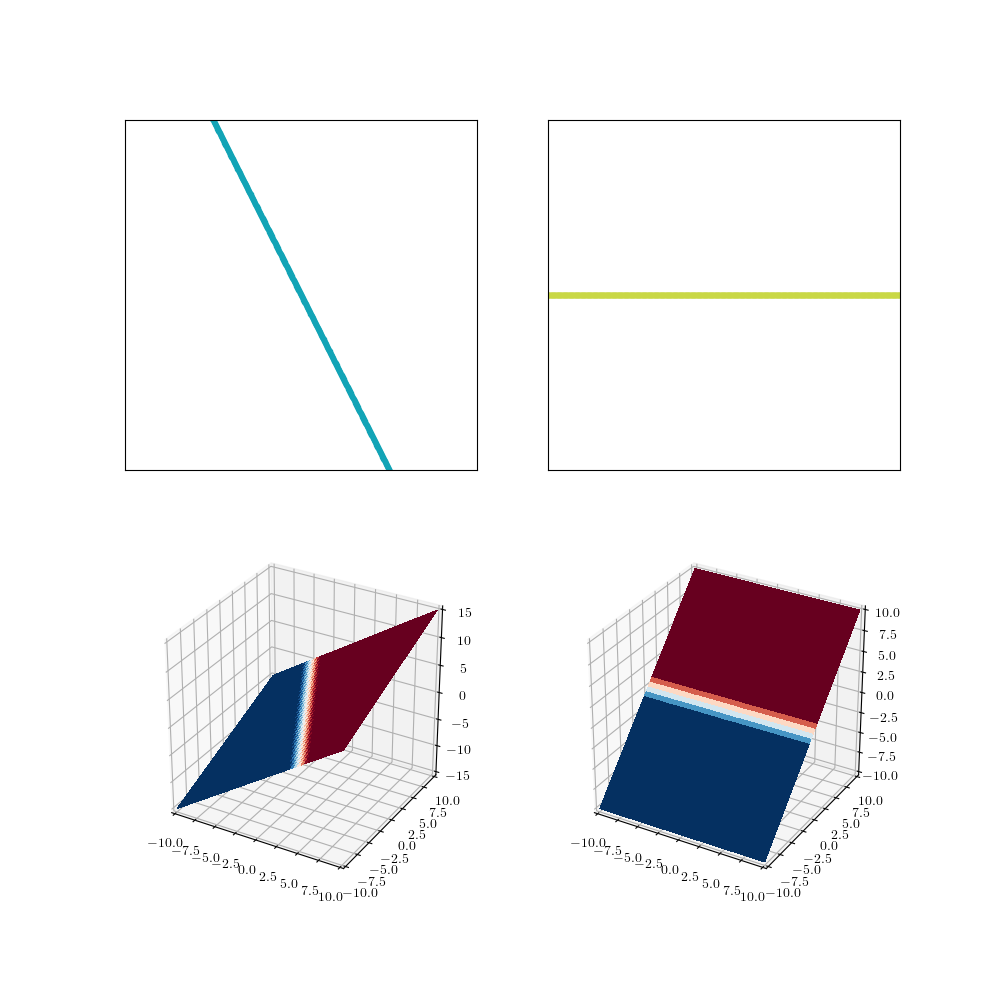

In [33]:
# Plot zero hidden layers
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

ax.set_xlim([-10, 10]);
ax.set_ylim([-10, 10]);
ax.set_xticks([])
ax.set_yticks([])

ax2.set_xlim([-10, 10]);
ax2.set_ylim([-10, 10]);
ax2.set_xticks([])
ax2.set_yticks([])

ax3.set_xlim([-10, 10]);
ax3.set_ylim([-10, 10]);
#ax3.set_xticks([])
#ax3.set_yticks([])
#ax3.set_zticks([])

ax4.set_xlim([-10, 10]);
ax4.set_ylim([-10, 10]);
#ax4.set_xticks([])
#ax4.set_yticks([])
#ax4.set_zticks([])



x1, y1, x2, y2 = calcFirstLayer(A1, b1)

ax.plot(x1, y1, '.', c='#12A4B6');
ax2.plot(x2, y2, '.', c='#C9D845');


ax.set_xlim([-10, 10]);
ax.set_ylim([-10, 10]);

ax2.set_xlim([-10, 10]);
ax2.set_ylim([-10, 10]);

Z = (np.matmul(A1, inputVal).T + b1).T
X = np.reshape(X, origShape)
Y = np.reshape(Y, origShape)
Z = np.reshape(Z[0, :], origShape)

ax3.plot_surface(X, Y, Z, cmap='RdBu_r', vmin=-1, vmax=1, linewidth=0, antialiased=False);

Z = (np.matmul(A1, inputVal).T + b1).T
X = np.reshape(X, origShape)
Y = np.reshape(Y, origShape)
Z = np.reshape(Z[1, :], origShape)

ax4.plot_surface(X, Y, Z, cmap='RdBu_r', vmin=-1, vmax=1, linewidth=0, antialiased=False);

In [ ]:
# First layer: Ax + b = 0
A1 = np.array([[1.0, 0.5], [0.0, 1.0]])
b1 = np.array([0.0, 0.0])
# Second layer: A2*ReLU(A1*x + b1) + b2 = 0
A2 = np.array([[1.0, 1.0], [-1.0, 1.0]])
b2 = np.array([-3.0, 2.0])

<IPython.core.display.Javascript object>


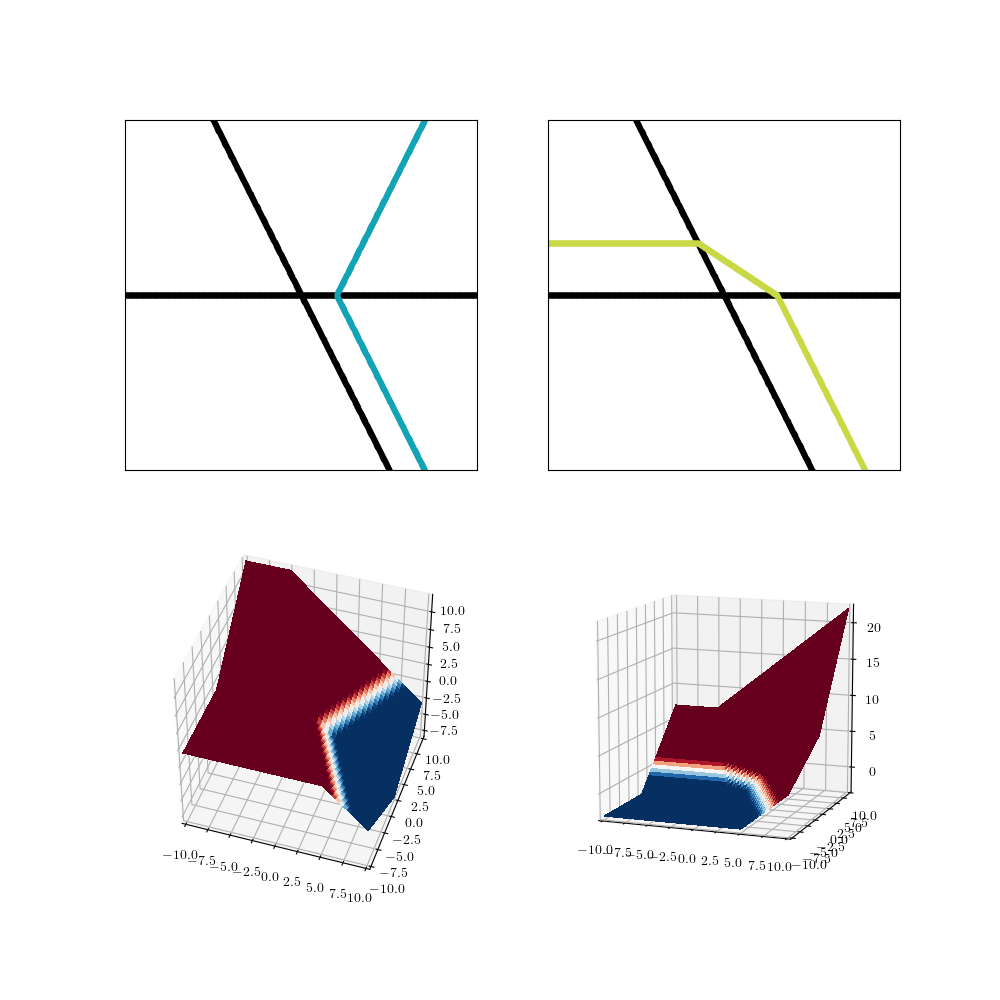

In [34]:
# Plot one hidden layers
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')


ax.set_xlim([-10, 10]);
ax.set_ylim([-10, 10]);
ax.set_xticks([])
ax.set_yticks([])

ax2.set_xlim([-10, 10]);
ax2.set_ylim([-10, 10]);
ax2.set_xticks([])
ax2.set_yticks([])

ax3.set_xlim([-10, 10]);
ax3.set_ylim([-10, 10]);
# ax3.set_xticks([])
# ax3.set_yticks([])
# ax3.set_zticks([])

ax4.set_xlim([-10, 10]);
ax4.set_ylim([-10, 10]);
# ax4.set_xticks([])
# ax4.set_yticks([])
# ax4.set_zticks([])

x1, y1, x2, y2 = calcFirstLayer(A1, b1)
ax.plot(x1, y1, 'k.');
ax.plot(x2, y2, 'k.');
ax2.plot(x1, y1, 'k.');
ax2.plot(x2, y2, 'k.');

x1, y1, x2, y2 = calcSecondLayer(A1, b1, A2, b2)
ax.plot(x2, y2, '.', c='#12A4B6');
ax2.plot(x1, y1, '.', c='#C9D845');

Z = np.maximum(np.matmul(A1, inputVal).T + b1, 0).T
Z = (np.matmul(A2, Z).T + b2).T
X = np.reshape(X, origShape)
Y = np.reshape(Y, origShape)
Z = np.reshape(Z[1, :], origShape)

ax3.plot_surface(X, Y, Z, cmap='RdBu_r', vmin=-1, vmax=1, linewidth=0, antialiased=False);

Z = np.maximum(np.matmul(A1, inputVal).T + b1, 0).T
Z = (np.matmul(A2, Z).T + b2).T
X = np.reshape(X, origShape)
Y = np.reshape(Y, origShape)
Z = np.reshape(Z[0, :], origShape)

ax4.plot_surface(X, Y, Z, cmap='RdBu_r', vmin=-1, vmax=1, linewidth=0, antialiased=False);


In [ ]:
# First layer: Ax + b = 0
A1 = np.array([[1.0, 0.5], [0.0, 1.0]])
b1 = np.array([0.0, 0.0])

<IPython.core.display.Javascript object>


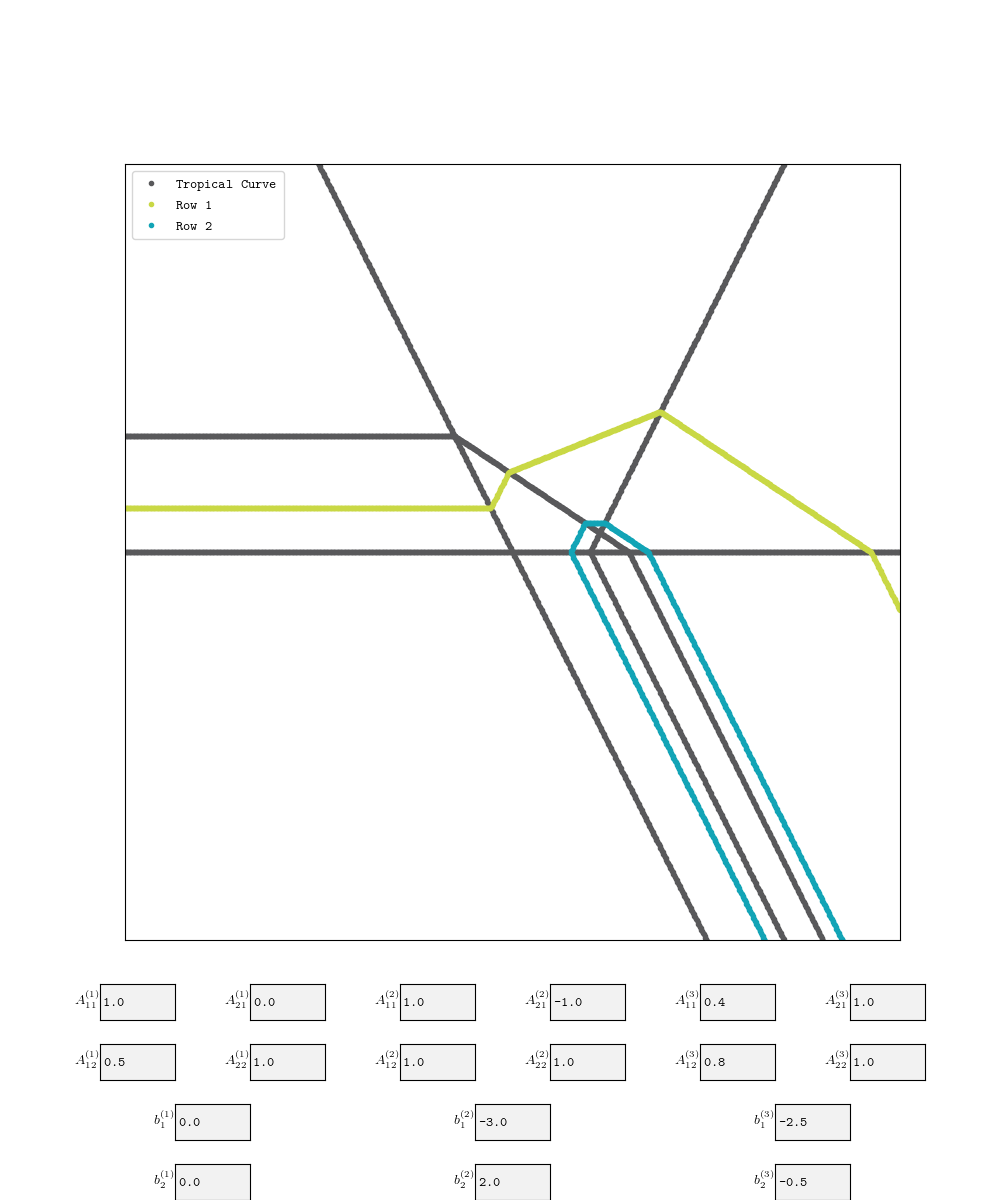

In [14]:
# Plot two hidden layers
plt.rcParams['figure.figsize'] = [10, 12]
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom = 0.2)
# Third layer: A3*ReLU(A2*ReLU(A1*x + b1) + b2) + b3 = 0
A1 = np.array([[1.0, 0.5], [0.0, 1.0]])
b1 = np.array([0.0, 0.0])

A2 = np.array([[1.0, 1.0], [-1.0, 1.0]])
b2 = np.array([-3.0, 2.0])

A3 = np.array([[0.4, 0.8], [1.0, 1.0]])
b3 = np.array([-2.5, -0.5])

from matplotlib.widgets import TextBox


gray = '#59595B'
slate = '#105456'
def make_plot():
    ax.clear()
    ax.set_xlim([-10, 10]);
    ax.set_ylim([-10, 10]);
    ax.set_xticks([])
    ax.set_yticks([])

    x1, y1, x2, y2 = calcFirstLayer(A1, b1)
    ax.plot(x1, y1, '.', c=gray);
    ax.plot(x2, y2, '.', c=gray)#, label='Input curve');

    x1, y1, x2, y2 = calcSecondLayer(A1, b1, A2, b2)
    ax.plot(x1, y1, '.', c=gray)
    ax.plot(x2, y2, '.', c=gray, label='Tropical Curve')

    x1, y1, x2, y2 = calcThirdLayer(A1, b1, A2, b2, A3, b3)

    ax.plot(x1, y1, '.', c='#C9D845', label='Row 1')
    ax.plot(x2, y2, '.', c='#12A4B6', label='Row 2');
    
    ax.legend()
    ax.set_aspect('equal', 'box')

text_boxes = []
for i in range(2):
    for j in range(2):
        def submit(text):
            A1[i, j] = float(text)
            make_plot()
            ax.draw()
        axbox = plt.axes([0.1 + 0.15*i, 0.1 + 0.05*(1-j), 0.075, 0.03])
        text_box = TextBox(axbox, '$A^{(1)}_{'+str(i+1) + str(j+1) + '}$', initial = str(A1[i, j]))
        text_box.on_submit(submit)
        text_boxes.append(text_box)

for i in range(2):
    for j in range(2):
        def submit(text):
            A2[i, j] = float(text)
            make_plot()
            ax.draw()
        axbox = plt.axes([0.4 + 0.15*i, 0.1 + 0.05*(1-j), 0.075, 0.03])
        text_box = TextBox(axbox, '$A^{(2)}_{'+str(i+1) + str(j+1) + '}$', initial = str(A2[i, j]))
        text_box.on_submit(submit)
        text_boxes.append(text_box)
        
for i in range(2):
    for j in range(2):
        def submit(text):
            A3[i, j] = float(text)
            make_plot()
            ax.draw()
        axbox = plt.axes([0.7 + 0.15*i, 0.1 + 0.05*(1-j), 0.075, 0.03])
        text_box = TextBox(axbox, '$A^{(3)}_{'+str(i+1) + str(j+1) + '}$', initial = str(A3[i, j]))
        text_box.on_submit(submit)
        text_boxes.append(text_box)
        
for i in range(2):
    def submit(text):
        b1[i] = float(text)
        make_plot()
        ax.draw()
    axbox = plt.axes([0.175, 0.0 + 0.05*(1-i), 0.075, 0.03])
    text_box = TextBox(axbox, '$b^{(1)}_{'+str(i+1) + '}$', initial = str(b1[i]))
    text_box.on_submit(submit)
    text_boxes.append(text_box)
    
for i in range(2):
    def submit(text):
        b2[i] = float(text)
        make_plot()
        ax.draw()
    axbox = plt.axes([0.3 + 0.175, 0.0 + 0.05*(1-i), 0.075, 0.03])
    text_box = TextBox(axbox, '$b^{(2)}_{'+str(i+1) + '}$', initial = str(b2[i]))
    text_box.on_submit(submit)
    text_boxes.append(text_box)
    
for i in range(2):
    def submit(text):
        b3[i] = float(text)
        make_plot()
        ax.draw()
    axbox = plt.axes([0.6 + 0.175, 0.0 + 0.05*(1-i), 0.075, 0.03])
    text_box = TextBox(axbox, '$b^{(3)}_{'+str(i+1) + '}$', initial = str(b3[i]))
    text_box.on_submit(submit)
    text_boxes.append(text_box)
        

make_plot()
plt.show()
